In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants as const
import seaborn as sns
sns.set(font_scale=1.2)

In [2]:
A = 4 # helium mass number
Zi = 2 # fully ionized helium
Kideal = 8.25e7 * ((1+Zi)/A) * u.erg / (u.g * u.K)
Ke = 3.14e12 * u.erg/u.cm**3 * (u.g/u.cm**3)**(-5/3) #  * (A*mp/Zi)
Kc = 2.23e12 * Zi**(2/3) * u.erg/u.cm**3 * (u.g/u.cm**3)**(-4/3) #  * (A*mp/Zi)**(4/3)

In [41]:
def radius(M, T=1e4*u.K):
    term1 = const.G*M
    term2 = Kc * M**(1/3)
    term3_a = (term1 + term2)**2
    term3_b = 4*Kideal*Ke*M**(2/3)*T
    term3 = term3_a - term3_b
    r = (term1 + term2 - np.sqrt(term3))/(2*Kideal*T)
    return r.to(u.solRad)

In [42]:
M = np.logspace(-5,0,1000)*u.solMass
R = radius(M)
R2 = radius(M, T=1e5*u.K)

/Users/luxemburg/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


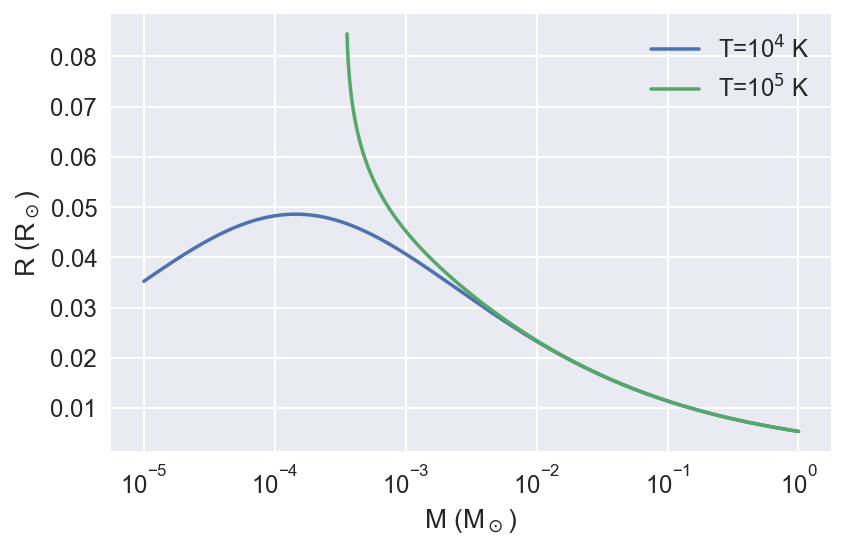

In [43]:
plt.semilogx(M, R, label='T=10$^4$ K')
plt.semilogx(M, R2, label='T=10$^5$ K')
plt.legend()
plt.xlabel('M (M$_\odot$)')
plt.ylabel('R (R$_\odot$)')
plt.gcf().tight_layout()
plt.savefig('mass_radius.jpg', dpi=150)

In [36]:
print('{:.3e}'.format(Kc))

3.540e+12 cm erg / g(4/3)


In [13]:
m_nu = np.linspace(0.01,1,100) * u.eV / const.c**2
Mmax = (const.hbar*const.c/const.G)**1.5 * m_nu**-2

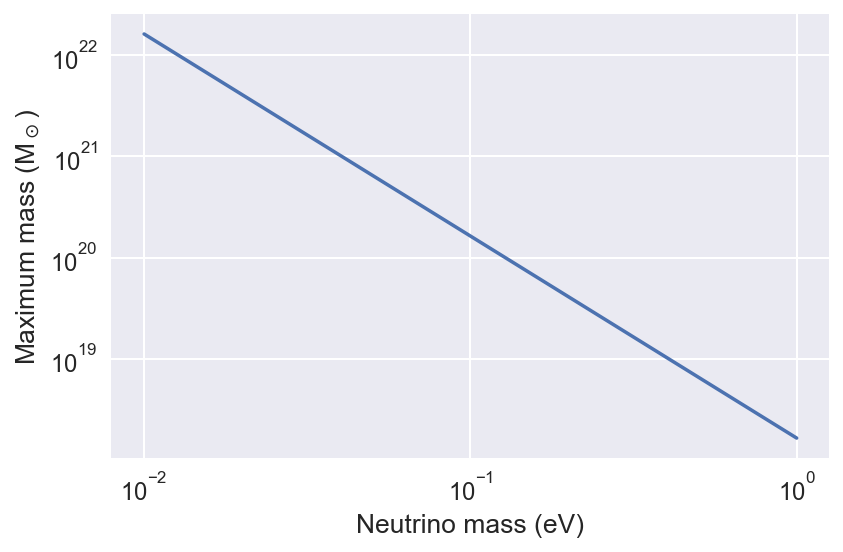

In [20]:
plt.loglog((m_nu*const.c**2).to(u.eV), Mmax.to(u.solMass))
plt.xlabel('Neutrino mass (eV)')
plt.ylabel('Maximum mass (M$_\odot$)')
plt.gcf().tight_layout()
plt.savefig('neutrino.jpg', dpi=150)

In [19]:
Mbh = 4e9 * u.solMass
mbh = (Mbh / (const.hbar*const.c/const.G)**1.5)**(-0.5)
(mbh * const.c**2).to(u.eV)

<Quantity 20196.21538123 eV>

In [44]:
Rbh = const.h**2/((0.1*u.eV/const.c**2)**(8/3) * const.G) * Mbh**(-1/3)
Rbh.to(u.pc)

<Quantity 1.06102608e+12 pc>

In [45]:
Rbh2 = const.h**2/((mbh)**(8/3) * const.G) * Mbh**(-1/3)
Rbh2.to(u.AU)

<Quantity 1558.70720993 AU>

In [46]:
Rbh.to(u.cm)

<Quantity 3.2739844e+30 cm>

In [47]:
Rbh2.to(u.cm)

<Quantity 2.3317928e+16 cm>